# Исследование данных о продажах компьютерных игр   
Описание проекта:  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Перечень основных задач
- Изучение общей информации
- Подготовка данных
- Исследовательский анализ данных
- Портрет пользователя каждого региона
- Гипотезы
- Общий вывод

# Описание данных
**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

**Данные за 2016 год могут быть неполными.**  

## Изучение общей информации

In [1]:
# подгрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
try:
    data = pd.read_csv(r'C:\Users\Дом\Desktop\dataset\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
    
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# посмотрим на общую инфу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим есть ли полные дубликаты в нашем датасете
data.duplicated().sum()

0

In [6]:
# посмотрим на пропуски в датасете
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(20,6), legend = False, fontsize = 16)
            .set_title('Доля пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

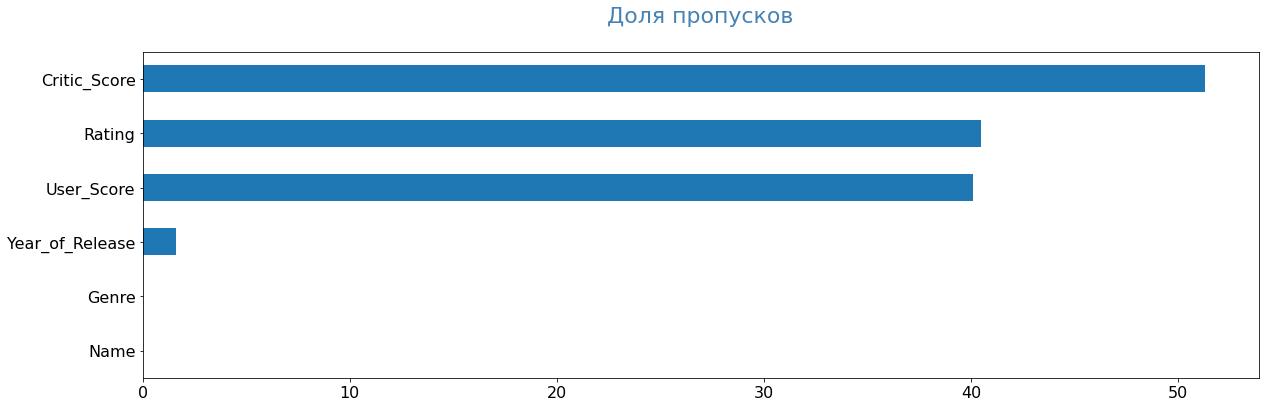

In [8]:
# Визуально отразим пропуски на графике в процентном соотношении
pass_value_barh(data)

In [9]:
# посмотрим на пропуски
data.query('Genre.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 игры без названия игры,без жанра, без оценок. Обьем продаж минимальный, 0,03 млн и 2,39 млн соответственно. я считаю что эти строки влияние на наше исследование оказывают минимальное. удалим эти строки чуть позднее в предобработке данных.

In [10]:
# посмотрим на пропуски
data.query('Year_of_Release.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# посмотрим на дубликаты в столбце имя комп. игры
print (data.Name.duplicated().sum())
data.query('Name.duplicated()').head()

5155


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M


В виду того что в столбце имя есть дубликаты, можно сделать вывод о том, что одна игра  может быть на разных платформах.

In [12]:
# посмотрим на пропуски
data.query('Critic_Score.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# посмотрим на пропуски
data.query('User_Score.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# посмотрим на пропуски
data.query('Rating.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
# посмотрим на распределение игр по жанрам
data.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [16]:
# распределение игр по платформе
data.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Вывод по изучению общей информации:**

- Нужно привести к нижнему регистру названия колонок 
- Необходимо привести столбец Year of Release к правильному типу данных 
- Имеются пустые значения в столбцах rating, user_score, critic_score, year of release.
- Мы можем заменить имеющиеся пустые значения в year of release на года от той же игры только другой платформы, в остальных случаях будем решать по мере исследования 
- Полных дубликатов в датасете нет  
- Т.к critic_score 100 бальная система а user_score - 10 бальная. Возможно, после предобработки этих колонок стоит их привести к единой системе (либо домножить одну колонку на 10, либо другую разделить на 10) для возможности сравнения баллов из двух колонок

## Подготовка данных

### Заменим названия столбцов (приведем к нижнему регистру);

In [17]:
# приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [18]:
# приведем к нижнему регистру значения в столбцах имя платформа жанр и рейтинг
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

# check
data.name.head()

0                  wii sports
1           super mario bros.
2              mario kart wii
3           wii sports resort
4    pokemon red/pokemon blue
Name: name, dtype: object

### **Обработаем пропуски при необходимости:**

In [22]:
# check nan in years
data.year_of_release.isna().sum()

269

In [23]:
# напишем цикл с помощью которого заполним пропуски в году выпуска игры, для тех игр у кого есть дубликаты записей 
for i in data[data['year_of_release'].isna() == True].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

C:\Users\Дом\AppData\Local\Temp\ipykernel_11428\125304534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()


In [24]:
# проверим сколько пропусков осталось после заполнения    
data.year_of_release.isna().sum()

146

In [25]:
# оставшиеся пропуски по году удалим
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.year_of_release.isna().sum()

0

In [26]:
# изменим тип данных в year_of_release
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')
data.year_of_release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16564    2016
16565    2006
16566    2016
16567    2003
16568    2016
Name: year_of_release, Length: 16569, dtype: int32

In [27]:
# удалим по 2 пропуска по имени и жанру.
data = data.dropna(subset=['genre']).reset_index(drop=True)

In [28]:
# check
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

**Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;** 

Я предполагаю что, аббревиатура tbd значит to be determined, to be done. Возможно данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому разумно будет заменить tbd на Nan

In [29]:
# check
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [30]:
# заменим tbd на nan и сменим тип данных на флоат
data.user_score = data.user_score.replace('tbd', np.NaN)
data.user_score = data.user_score.astype(float)
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [31]:
#check
print (data.critic_score.dtype)
data.critic_score.unique()

float64


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [32]:
# приведем critic_score к подобию user_score.
data.critic_score = data.critic_score / 10

# check
print (data.critic_score.dtype)
data.critic_score.unique()

float64


array([7.6, nan, 8.2, 8. , 8.9, 5.8, 8.7, 9.1, 6.1, 9.7, 9.5, 7.7, 8.8,
       8.3, 9.4, 9.3, 8.5, 8.6, 9.8, 9.6, 9. , 8.4, 7.3, 7.4, 7.8, 9.2,
       7.1, 7.2, 6.8, 6.2, 4.9, 6.7, 8.1, 6.6, 5.6, 7.9, 7. , 5.9, 6.4,
       7.5, 6. , 6.3, 6.9, 5. , 2.5, 4.2, 4.4, 5.5, 4.8, 5.7, 2.9, 4.7,
       6.5, 5.4, 2. , 5.3, 3.7, 3.8, 3.3, 5.2, 3. , 3.2, 4.3, 4.5, 5.1,
       4. , 4.6, 3.9, 3.4, 3.5, 4.1, 3.6, 2.8, 3.1, 2.7, 2.6, 1.9, 2.3,
       2.4, 2.1, 1.7, 1.3])

In [33]:
# посмотрим на оценки и рейтинг в разрезе одной игры.
data[data['name'] == 'monopoly']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
655,monopoly,pc,1994,misc,1.49,0.81,0.0,0.10,NaN,NaN,NaN
908,monopoly,wii,2008,misc,0.86,0.83,0.0,0.20,7.0,7.8,e
1244,monopoly,ps,1997,misc,1.18,0.27,0.0,0.05,NaN,NaN,NaN
3363,monopoly,x360,2008,misc,0.34,0.20,0.0,0.06,5.6,5.8,e
4494,monopoly,ps2,2008,misc,0.21,0.16,0.0,0.05,NaN,7.2,e
5353,monopoly,ps3,2008,misc,0.25,0.05,0.0,0.04,5.4,6.7,e
6294,monopoly,ds,2010,misc,0.15,0.09,0.0,0.02,NaN,NaN,NaN
7343,monopoly,n64,1999,misc,0.17,0.04,0.0,0.00,NaN,NaN,NaN


Пропуски в Оценки критиков и пользователей заполнять не будем. Природа пропусков тут и ее причины возникновения очень многогранные. Тут могут быть и такие факторы как добровольность оценок, и разные годы выпуска игр, особенно в те годы когда данной ассоциации по оценке игр еще не существовало. А так же отсутствует смысл заполнения данных столбцов синтетическими данными. Одна игра на разных платформах может быть оценена и критиками и пользователями совершенно по разному и причин на это может быть тоже много, будь то оптимизация игры к определенной платформе, удобность интерфеса и качество графики и производительность игры. Поэтому оставляем пропуски в данных колонках. Если дальше для исследования пропуски в этих столбцах будут нам мешать, пропуски можно будет заменить значением - маркером, который точно не встреается в данных.

**Попробуем заполнить пропуски по столбцу рейтинг, на основании совпадении имени игры с пропуском в рейтинге и совпадении имени игры на другой платформе с наличием данных в рейтинге. Заполнять будем через моду из списка рейтинга по совпадению имени.**
Логика для принятия данного решения заключается в следующем. Возьмем пример игры монополии из таблицы выше. Смена платформы не должна влиять на возрастной рейтинг игры, потому что, по сути игра остается той же что и на смежной платформе. т.е предоставляемый игровой контэнт определенной игры не меняется от смены платформы, а следовательно и рейтинг должен быть у одной игры на всех платформах одинаковый. Поэтому логично взять совпадение имен игр которые повторяются 2 и более раз и взять за основу моду рейтинга в не пустых столбцах.

Оставшиеся пропуски скорее всего заполним значениями-маркером.

In [34]:
# пропуски в рейтинге до
before = data.rating.isna().sum()
before

6699

In [35]:
# создадим отфильтрованную таблицу с упоминанием одноименной игры 2 и более раза
df2 = data[['name', 'platform', 'rating']].value_counts('name')
df2 = df2[df2 > 2]

# через цикл расчитаем моду по не пустым значениям рейтинга и заполним пустые значения подходящие по условию
for t in df2.index:
    mode_series = data.loc[(data['name'] == t) & (data['rating'].notna()), 'rating'].mode()
    if mode_series.size > 0:
        data.loc[(data['name'] == t) & (data['rating'].isna()), 'rating'] =\
        data.loc[(data['name'] == t) & (data['rating'].notna()), 'rating'].mode()[0]

In [36]:
# пропуски в рейтинге после замены
after = data.rating.isna().sum()
after

6433

In [37]:
# доля значений в процентах которые были заменены относительно всего датасета
(before - after) / data.shape[0] * 100

1.6056014969517716

К сожалению проделанная работа оказалось не слишком результативной, мы заполнили лишь 1.6% данных.

**Оставщиеся пропуски заполним значениями-маркером, что бы в будущем иметь возможность их учитывать.  
Договоримся о значениях-маркерах по столбцам:**
- critic_score - значение маркер - "-9.9" Отрицательная оценка которая точно не попадается в значениях столбца
- user_score - аналогично вышеописанному - значение маркер - "-9.9"
- rating - Nan заменим на "Unknown"

In [38]:
# заменяем пропуски значением-маркером
data.critic_score = data.critic_score.fillna(-9.9).reset_index(drop=True)

In [39]:
# заменяем пропуски значением-маркером
data.user_score = data.user_score.fillna(-9.9).reset_index(drop=True)

In [40]:
# заменяем пропуски значением-маркером
data.rating = data.rating.fillna("Unknown").reset_index(drop=True)

In [41]:
# check
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Итого:**
- мы удалили пропуски по жанру. там 2 строки которые, которые не оказывают влияния на исследование.
- мы заполнили часть пропусков по year_of_release, синтетическими данными по одинаковому имени игры с другой платформы. остальные пропуски были удалены.
- частично пропуски по рейтингу были заполнены на основании совпадений имени игры с другой пталформы.
- пропуски в оценках критиков, оценках пользователей, и рейтинг были заменены на значения-маркеры, что бы в дальнейшем их можно было учесть.

**Причины, которые могли привести к пропускам:**

Оценки ползователей и критиков:  
Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 2001). Поэтому, вполне вероятно, что не все игры представленные в датасете имеют оценки пользователей и критиов. Некоторые игры были выпущены еще до создания таких платформ и следовательно не имеют оценок. А так же раз 2016 год не полный по ним тоже могут встретиться пропуски потому что игра еще могла не успеть получить тот или иной рейтинг. 

Рейтинг игр:  
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Была основана в 1994 году.  
Другие регионы мира также имеют свои собственные рейтинги видеоигр. Они в основном следуют схожим схемам. Например, в Японии есть CERO (Организация компьютерных рейтингов развлечений), а в Европе - PEGI, что означает «Общеевропейская игровая информация», является стандартом для рейтинга видеоигр в большей части Европы.  
До ESRB рейтинги видеоигр были на уровне производителей консолей. В то время Nintendo не оценивала игры, но имела репутацию цензуры игр, чтобы сделать их удобными для семьи. Между тем у Sega была своя собственная рейтинговая система для своих консолей.  

Исходя из вышеописанно я считаю что при данных обстоятельствах у нас есть куча факоторов из за которых игра могла не получить рейтинг, например такие как: 
- ESRB ориентирована только на рынок США\Канады, следовательно издатель из другого региона, может быть мало заинтересован в присвоении такого рейтинга, если он не планирует выходить на СевероАмериканский рынок.
- нужно так же учесть что ESRB, не является юридически обязательной процедурой для выпуска игры, но без присвоенного рейтинга большинство крупных магазинов могу просто отказаться её продавать.
- Игра могла быть выпущена до появления таких систем присвоения рейтинга.
- Еще не успеть быть оценена на момент формирования датасета.


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [42]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-9.9,-9.9,Unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-9.9,-9.9,Unknown,31.38


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [44]:
# Построим сводную таблицу по году и колличеству игр и на основе сводной талбицы построим простой линейный график
data_pivot = data.pivot_table(index ='year_of_release', values ='name', aggfunc ='count')
data_pivot.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


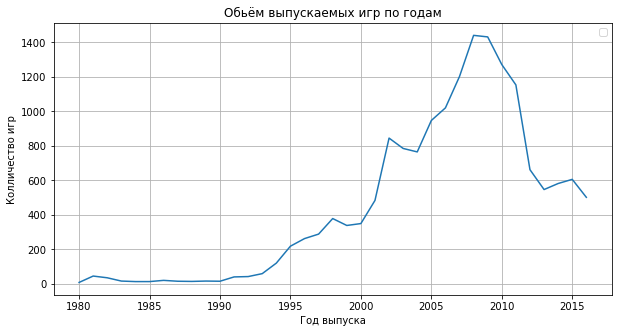

In [45]:
# На основе сводной таблицы построим простой линейный график
data_pivot.plot( figsize=(10,5), grid = True);
plt.title('Обьём выпускаемых игр по годам');
plt.xlabel('Год выпуска');
plt.ylabel('Колличество игр');
plt.legend('');

Из графика видно:
- Рост выпускаемых игр начиная с 90х годов до 2008 года.
- После 2008 наблюдается спад консольных игр. предположительно в виду роста популярности игр на мобильном рынке.

### Посмотрим, как менялись продажи по платформам.Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [46]:
# составим сводную таблицу  по платформам и общим продажам

platform_sales = data.pivot_table(index='platform', \
                                  values='total_sales', \
                                  aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales.head()

,total_sales
platform,
ps2,1247.16
x360,966.61
ps3,935.19
wii,903.31
ds,804.28


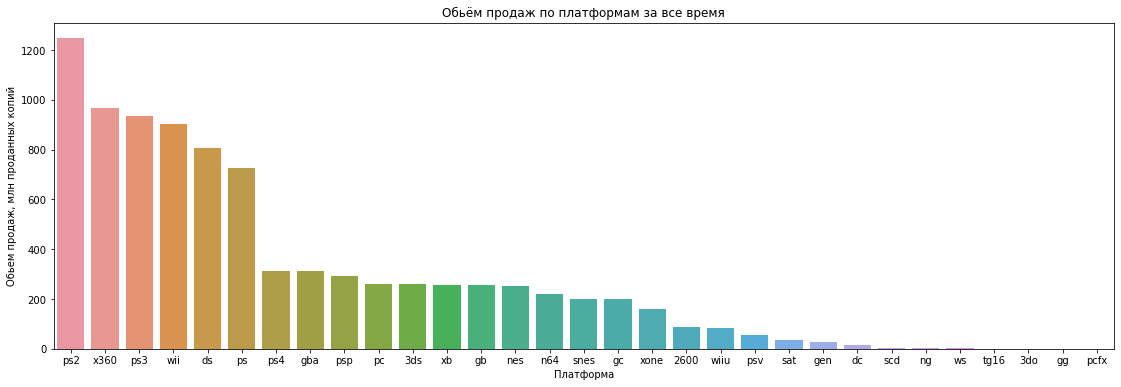

In [47]:
# визуализируем данные

plt.figure(figsize=(19,6))
sns.barplot(x=platform_sales.index, y=platform_sales.total_sales);
plt.title ('Обьём продаж по платформам за все время');
plt.xlabel ('Платформа');
plt.ylabel ('Обьем продаж, млн проданных копий');

Из графика можно выделить топ 5 самых популярных платформ за всё время: ps2, x360, ps3, wii, ds

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Поэтому определим актуальный период как 3 полных года.

In [49]:
# Определим топ 5 платформ за актуальный период.

platform_sales = data[data.year_of_release >= 2013].pivot_table(index='platform', \
                                  values='total_sales', \
                                  aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales.head()

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80


In [50]:
# напишем функцию для создания сводных таблиц по списку топ платформ и продажам за актуальный период

def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] >= 2013)]
    total = (
        slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
              .sort_values('year_of_release', ascending=False)
    )
    return total

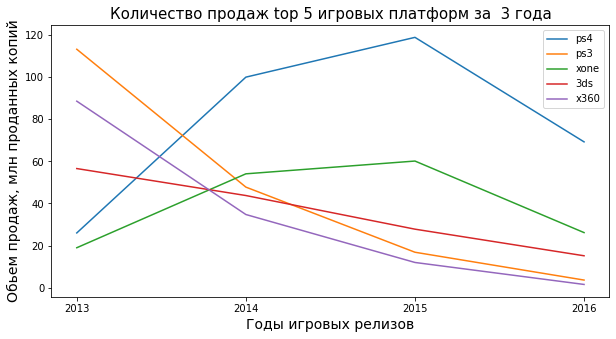

In [51]:
# Нарисуем график продаж по годам, каждой игровой платформы из топ 5, за актуальный период.

plt.figure(figsize=(10,5))
plt.title('Количество продаж top 5 игровых платформ за  3 года', fontsize=15)
plt.xlabel('Годы игровых релизов', fontsize=14)
plt.ylabel('Обьем продаж, млн проданных копий', fontsize=14)

for i in platform_sales.index[0:5]:
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i).set_xticks([2013, 2014, 2015, 2016])
    plt.legend()

**Выводы:**
- За актуальный период рост продаж показали только 2 платформы ps4 и Xone.
- Остальные платформы ps3 3ds и x360 показали спад.
- Спад ps3 b x360 можно обьяснить выходом приставок следующих поколений которые из заместили.
- Спад 3ds равномерный и не такой сильный - его можно обьяснить естественным снижением интереса потребителей к данной приставки по истечению времени. Всетаки 3ds занимает немного другое, "свое" место на данном рынке, потому что является портативной игровой консолью. И на его место в будущем придет Nintendo Switch в 2017 году, уже за рамками исследуемого нами здесь периода.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [52]:
# создадим датасет с топ 5 платформами
list_of_top5 = ['ps2','x360','ps3','wii','ds']
data_top_5_platforms = data[data['platform'].isin(list_of_top5)]
data_top_5_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.9,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.8,6.6,e,28.91


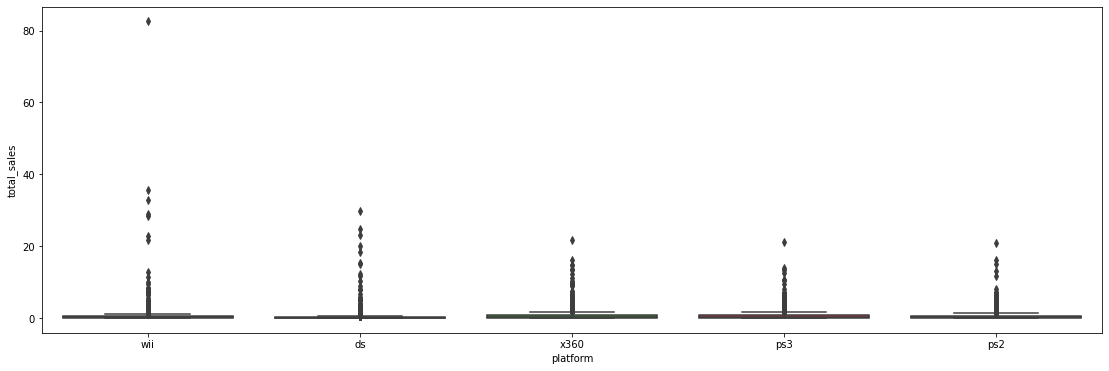

In [53]:
# нарисуем ящик с усами
plt.figure(figsize=(19,6))
sns.boxplot(data = data_top_5_platforms, x='platform', y='total_sales');

In [54]:
# изучим данные по всем продажам
data_top_5_platforms.total_sales.describe()

count    8140.000000
mean        0.596628
std         1.789856
min         0.000000
25%         0.080000
50%         0.190000
75%         0.530000
max        82.540000
Name: total_sales, dtype: float64

In [55]:
# изучим данные по всем продажам в разрезе подозрительной платформы
data_top_5_platforms.query('platform=="wii"').total_sales

0        82.54
2        35.52
3        32.77
7        28.91
8        28.32
         ...  
16441     0.01
16478     0.01
16516     0.01
16537     0.01
16538     0.01
Name: total_sales, Length: 1301, dtype: float64

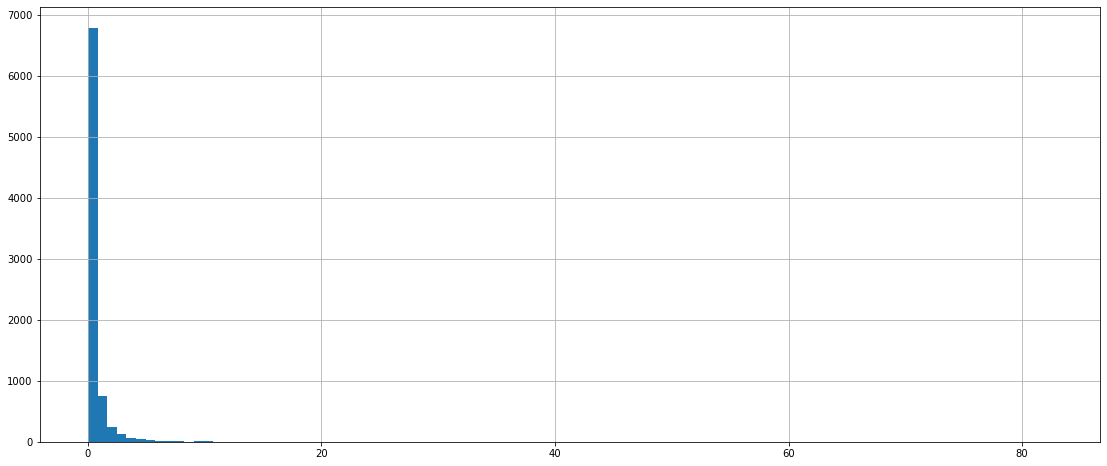

In [56]:
# построим гистограммы что бы понять как распределены данные по продажам
data_top_5_platforms.total_sales.hist(bins=100, figsize=(19,8));

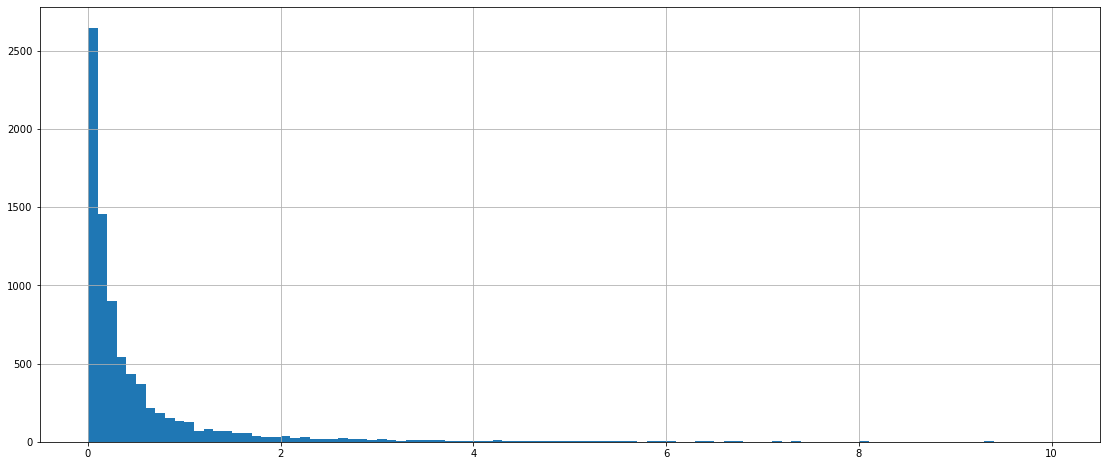

In [57]:
data_top_5_platforms.total_sales.hist(bins=100, range=(0,10), figsize=(19,8));

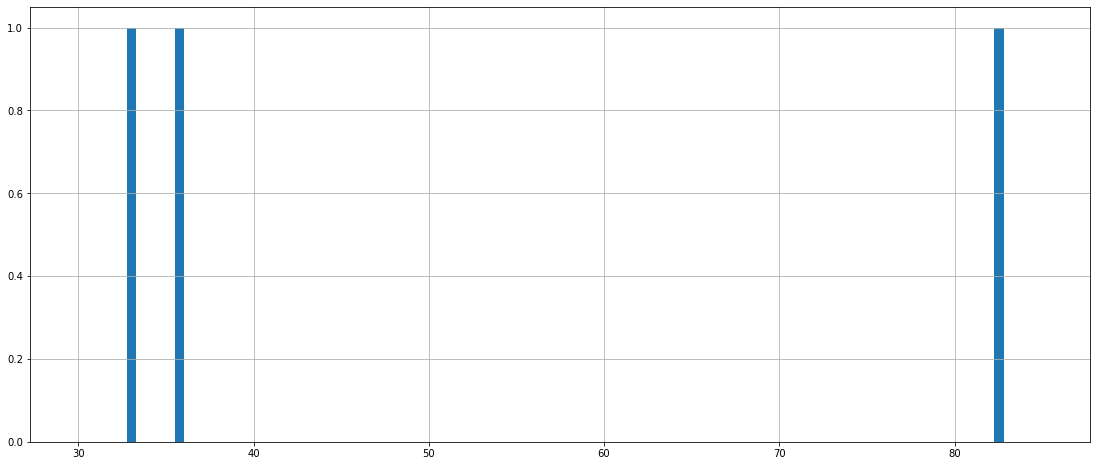

In [58]:
data_top_5_platforms.total_sales.hist(bins=100, range=(30,85), figsize=(19,8));

Выбросы мешают построить нормально ящик с усами. Избавимся от выбросов. Describe() показал нам что 75% процентиль total_sales = 0.530000. Соответственно выбросом будет считать все что выше 1.5

In [59]:
# удаляем выбросы
data_top_5_platforms = data_top_5_platforms[data_top_5_platforms['total_sales']<1.5]

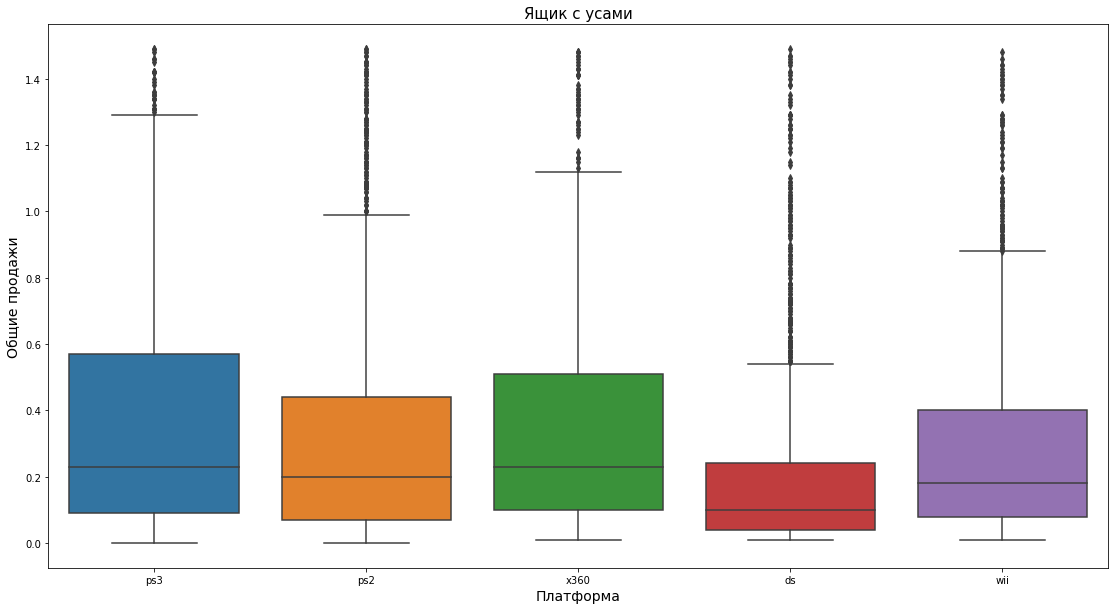

In [60]:
# строим ящик с усами по новым данным
plt.figure(figsize=(19,10));
sns.boxplot(data=data_top_5_platforms, x='platform', y='total_sales');
plt.title('Ящик с усами', fontsize=15);
plt.xlabel('Платформа', fontsize=14);
plt.ylabel('Общие продажи',fontsize=14);

Выводы:
- Для того что бы построить ящик с усами, пришлось избавиться от выбросов.
- Топ продаж не изменился - PS3, DS - ниже всех, из топ-5 платформ.
- Медиана у всех платформ отличается.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [61]:
# сделаем срез и расчитаем корреляцию

ps3 = data.query('platform == "ps3"')
clear_ps3 = data.query('platform == "ps3" and user_score >= 0 and critic_score >= 0')

print ('Корреляция между оценками пользователей и продажами, платформы PS3',\
       format(clear_ps3.user_score.corr(clear_ps3.total_sales), '.2f'))
print ('Корреляция между оценками критиков и продажами, платформы PS3',\
       format (clear_ps3.critic_score.corr(clear_ps3.total_sales), '.2f'))

Корреляция между оценками пользователей и продажами, платформы PS3 0.14
Корреляция между оценками критиков и продажами, платформы PS3 0.43


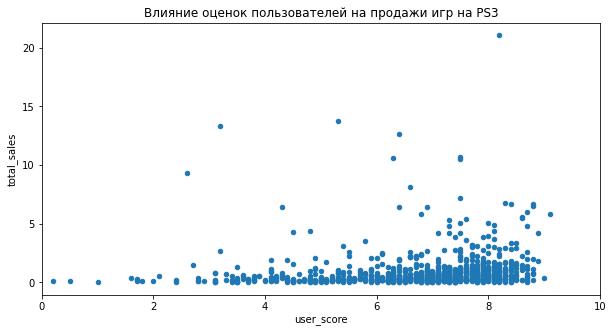

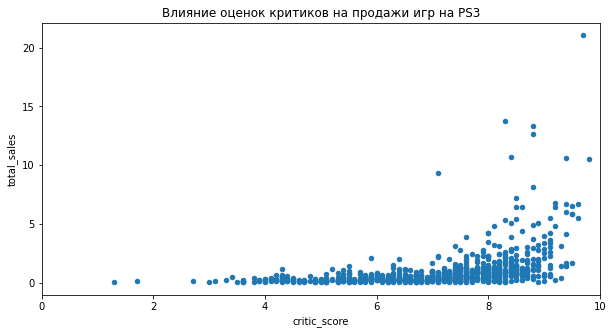

In [62]:
# Построим графики рассеивания

ps3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,5));
plt.xlim(0,10);
plt.title('Влияние оценок пользователей на продажи игр на PS3');
ps3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,5));
plt.xlim(0,10);
plt.title('Влияние оценок критиков на продажи игр на PS3');

### Соотнесем выводы с продажами игр на других платформах.

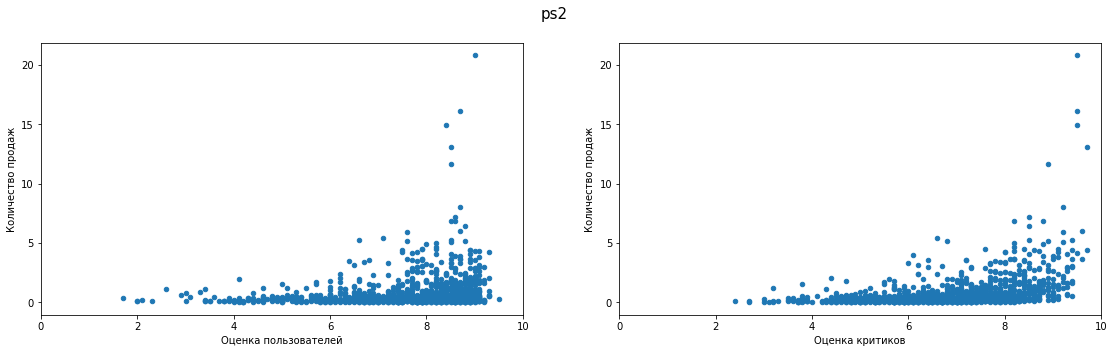

Корреляция между отзывами пользователей и продажами на игровой платформе PS2 : Слабая 0.17
Корреляция между отзывами критиков и продажами на игровой платформе PS2 : Умеренная 0.40


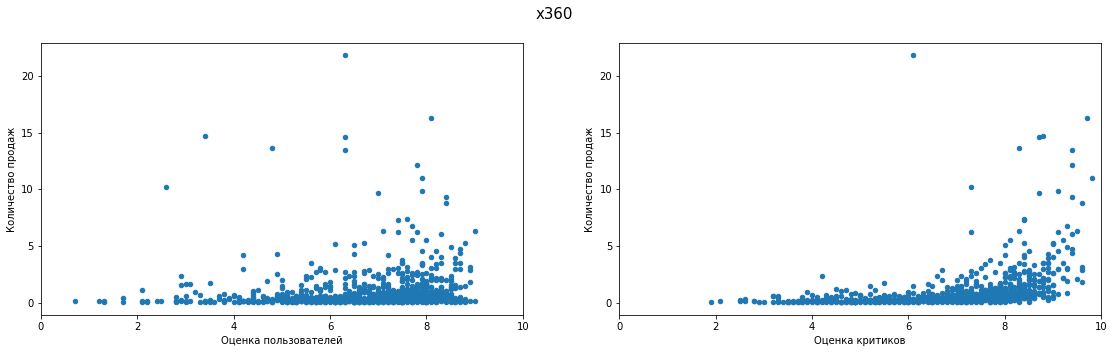

Корреляция между отзывами пользователей и продажами на игровой платформе X360 : Слабая 0.11
Корреляция между отзывами критиков и продажами на игровой платформе X360 : Умеренная 0.39


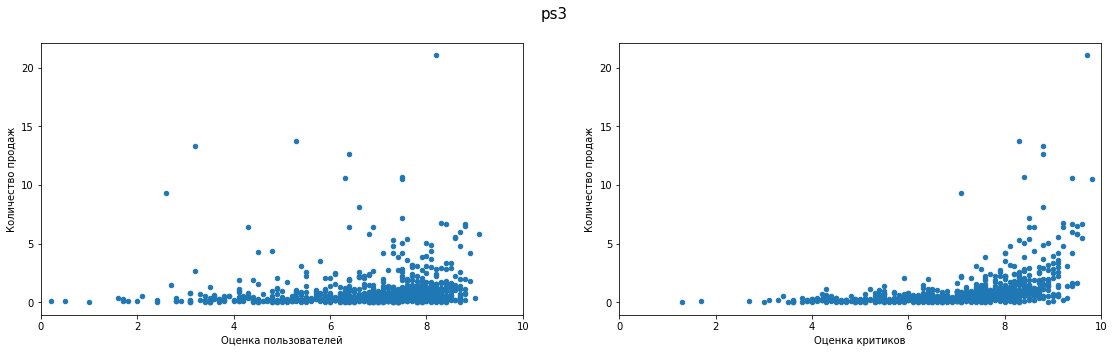

Корреляция между отзывами пользователей и продажами на игровой платформе PS3 : Слабая 0.13
Корреляция между отзывами критиков и продажами на игровой платформе PS3 : Умеренная 0.43


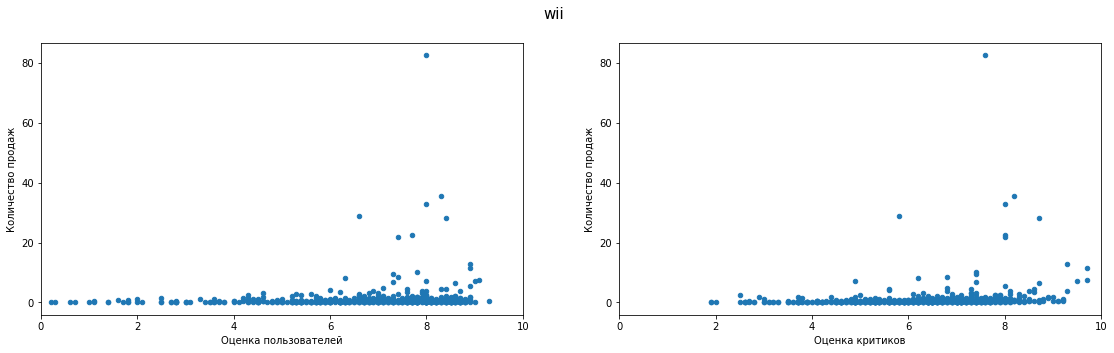

Корреляция между отзывами пользователей и продажами на игровой платформе WII : Слабая 0.11
Корреляция между отзывами критиков и продажами на игровой платформе WII : Слабая 0.18


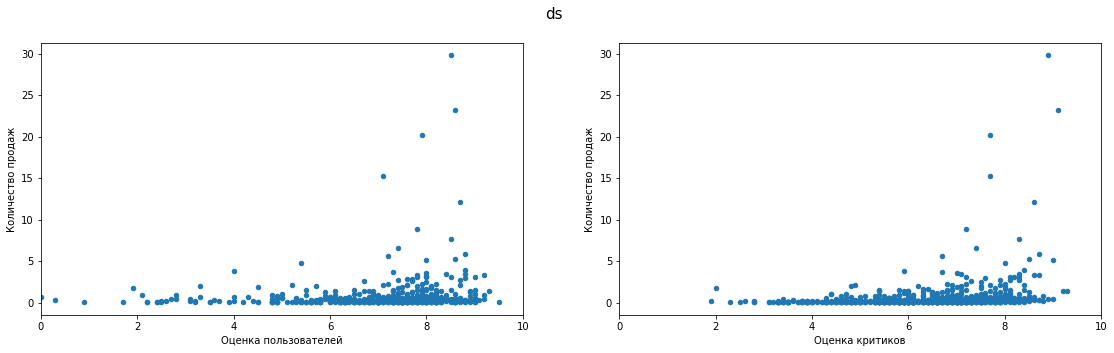

Корреляция между отзывами пользователей и продажами на игровой платформе DS : Слабая 0.13
Корреляция между отзывами критиков и продажами на игровой платформе DS : Слабая 0.24


In [63]:
# через цикл построим диаграмму рассеяния по каждой top платформе и расчитает корреляцию оценок к продажам для каждой платформы

for i in list_of_top5:
    platforms = data[data['platform'] == i]
    fig, ax = plt.subplots(1 ,2, figsize=(19,5))
    platforms.plot(kind='scatter',x='user_score', y='total_sales', ax=ax[0]);
    platforms.plot(kind='scatter',x='critic_score', y='total_sales', ax=ax[1]);
    ax[0].set_xlim([0,10])
    ax[1].set_xlim([0,10])
    fig.suptitle(i, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    # расчитаем корреляцию и выведем ее под каждым графиком
    user_correl = platforms.query('user_score >= 0').user_score.corr(platforms.total_sales)
    critic_correl = platforms.query('critic_score >= 0').critic_score.corr(platforms.total_sales)
    
    # напишем текст + распределим корреляцию по интервалам, для принта
    if user_correl < 0.1:
        print('Связи нет')
    if 0.3 >= user_correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами на игровой платформе', i.upper(), ': Слабая',\
              format(user_correl, '.2f'))
    if 0.5 >= user_correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами на игровой платформе', i.upper(), ': Умеренная',\
              format(user_correl, '.2f'))
    if 0.7 >= user_correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами на игровой платформе', i.upper(), ': Довольно высокая',\
              format(user_correl, '.2f'))
    if 0.9 >= user_correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами на игровой платформе', i.upper(), ': Высокая',\
              format(user_correl, '.2f'))
    if 1 >= user_correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами на игровой платформе', i.upper(), ': Сильная',\
              format(user_correl, '.2f'))
        
    if critic_correl < 0.1:
        print('Связи нет')    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и продажами на игровой платформе', i.upper(), ': Слабая',\
              format(critic_correl, '.2f'))
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и продажами на игровой платформе', i.upper(), ': Умеренная',\
              format(critic_correl, '.2f'))
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и продажами на игровой платформе', i.upper(), ': Довольно высокая',\
              format(critic_correl, '.2f'))
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и продажами на игровой платформе', i.upper(), ': Высокая',\
              format(critic_correl, '.2f'))
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и продажами на игровой платформе', i.upper(), ': Сильная',\
              format(critic_correl, '.2f'))

Что можно подытожить в данном пунке:
- У всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
- Оценка пользователей слабо влияет на объём продаж
- Оценка критиков сильнее влияет на объём продаж. Покупатели игр более прислушиваются к критикам нежели к оценкам пользователей.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [66]:
# Построим таблицу за актуальный период, распределение сум, средних и медианных значений по жанрам.

genre = data[data.year_of_release >= 2013]\
            .pivot_table(index='genre', values='total_sales', aggfunc =['sum','mean', 'median'])\
            .sort_values(('sum', 'total_sales'), ascending=False)
genre

,sum,mean,median
,total_sales,total_sales,total_sales
genre,,,
action,322.50,0.419376,0.110
shooter,232.98,1.245882,0.450
sports,150.65,0.703972,0.240
role-playing,145.89,0.499623,0.125
misc,63.06,0.404231,0.105
platform,42.63,0.576081,0.225
racing,39.89,0.469294,0.120
fighting,35.31,0.441375,0.125


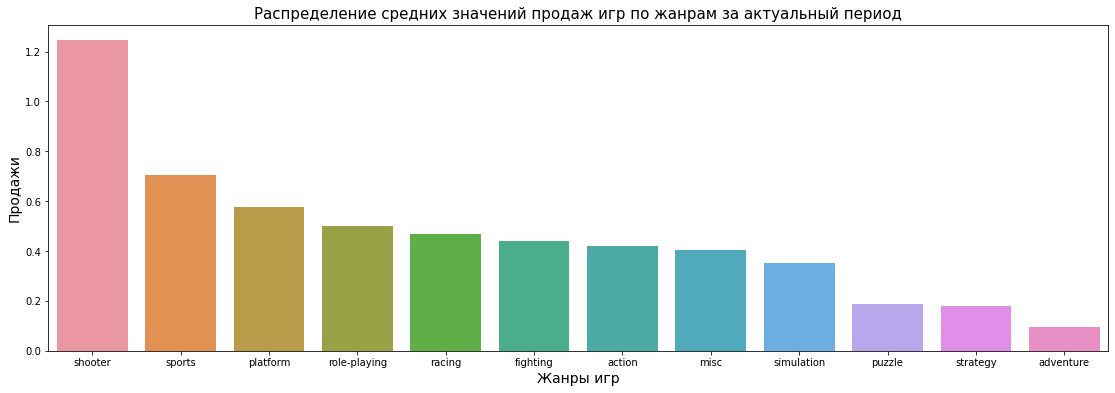

In [67]:
# Распределение игр по жанрам за актуальный период, по среднему значению

genre = data[data.year_of_release >= 2013].groupby('genre')['total_sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(19,6));
plt.title('Распределение средних значений продаж игр по жанрам за актуальный период',fontsize=15);
sns.barplot(data=genre,x=genre.index, y='total_sales');
plt.xlabel('Жанры игр',fontsize=14);
plt.ylabel('Продажи',fontsize=14);

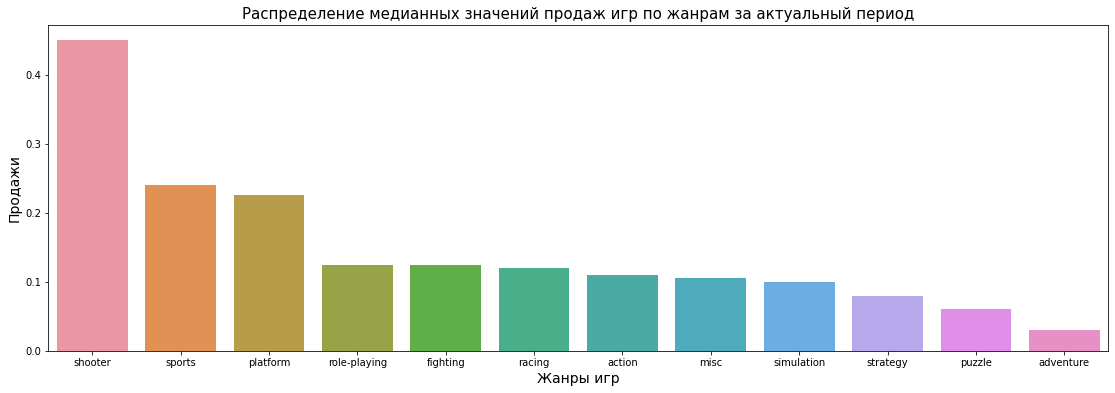

In [68]:
# Распределение игр по жанрам за актуальный период, по медианному значению

genre = data[data.year_of_release >= 2013].groupby('genre')['total_sales'].median().sort_values(ascending=False).to_frame()

plt.figure(figsize=(19,6));
plt.title('Распределение медианных значений продаж игр по жанрам за актуальный период',fontsize=15);
sns.barplot(data=genre,x=genre.index, y='total_sales');
plt.xlabel('Жанры игр',fontsize=14);
plt.ylabel('Продажи',fontsize=14);

**Выводы:**
- Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов.
- Поэтому для построения графиков были выбраны средние или медианные продажи, что бы найти жанр, где игры стабильно приносят высокий доход.
- Лидирующим жанром по доходности оказался Shooter, sports и platform на втором и третьем месте соответственно. Данные платформы лидируют как по средним значениям так и по Медианным. 
- Самыми менее доходными оказались жанры strategy puzzle and adventure.

**Общий вывод по исследовательскому анализу данных:**
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью начиная с 90х годов до 2008 года. С 2008 года, предположительно после того как массово начали создавать мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Средний жизненый цикл игровой платформы составляет около 10-ти лет. Пик продаж наступает примерно на середине жизненого цикла приставки.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- За актуальный период рост продаж показали только 2 платформы ps4 и Xone.
- Остальные платформы ps3 3ds и x360 показали спад.
- Спад ps3 b x360 можно обьяснить выходом приставок следующих поколений которые из заместили.
- Спад 3ds равномерный и не такой сильный - его можно обьяснить естественным снижением интереса потребителей к данной приставки по истечению времени. Всетаки 3ds занимает немного другое, "свое" место на данном рынке, потому что является портативной игровой консолью. И на его место в будущем придет Nintendo Switch в 2017 году, уже за рамками исследуемого нами здесь периода.
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Значительнее корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей.
- Стоит отметить что тройка лидеров вне зависимости от исследуемого периода не меняется. Это Action, Sport, and Shooter.
- Лидирующим жанром по доходности оказался Shooter, sports и platform на втором и третьем месте соответственно. Данные платформы лидируют как по средним значениям так и по Медианным. 
- Самыми менее доходными оказались жанры strategy puzzle and adventure.


## Портрет пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
# Составим сводные таблицы по жанру с распределением значений по интересующим нас регионам. Выделим их Доли

genre_portret = data.groupby('genre')[['na_sales','eu_sales','jp_sales','total_sales']]\
                    .sum()\
                    .sort_values('total_sales', ascending=False)

genre_portret['%_na'] = genre_portret.na_sales / genre_portret.total_sales * 100
genre_portret['%_eu'] = genre_portret.eu_sales / genre_portret.total_sales * 100
genre_portret['%_jp'] = genre_portret.jp_sales / genre_portret.total_sales * 100

genre_portret = genre_portret.style.format("{:,.2f}")

genre_portret

,na_sales,eu_sales,jp_sales,total_sales,%_na,%_eu,%_jp
genre,,,,,,,
action,873.70,517.58,160.15,"1,735.63",50.34,29.82,9.23
sports,681.69,375.60,135.27,"1,326.71",51.38,28.31,10.20
shooter,590.35,316.96,38.70,"1,050.02",56.22,30.19,3.69
role-playing,330.12,188.30,353.88,931.77,35.43,20.21,37.98
platform,444.44,199.87,130.71,826.03,53.80,24.20,15.82
misc,401.69,211.32,108.04,794.41,50.56,26.60,13.60
racing,357.90,235.47,56.64,725.82,49.31,32.44,7.80
fighting,221.20,99.19,87.28,443.59,49.87,22.36,19.68
simulation,180.85,113.37,63.64,388.46,46.56,29.18,16.38


In [70]:
# Составим сводные таблицы по платформе с распределением значений по интересующим нас регионам. Выделим их Доли

platform_portret = data.groupby('platform')[['na_sales','eu_sales','jp_sales','total_sales']]\
                       .sum()\
                       .sort_values('total_sales', ascending=False)

platform_portret['%_na'] = platform_portret.na_sales / platform_portret.total_sales * 100
platform_portret['%_eu'] = platform_portret.eu_sales / platform_portret.total_sales * 100
platform_portret['%_jp'] = platform_portret.jp_sales / platform_portret.total_sales * 100

platform_portret = platform_portret.style.format("{:,.2f}")

platform_portret

,na_sales,eu_sales,jp_sales,total_sales,%_na,%_eu,%_jp
platform,,,,,,,
ps2,580.09,337.05,137.74,"1,247.16",46.51,27.03,11.04
x360,599.15,269.79,12.33,966.61,61.98,27.91,1.28
ps3,391.60,328.97,79.52,935.19,41.87,35.18,8.50
wii,494.01,261.48,69.05,903.31,54.69,28.95,7.64
ds,381.38,188.72,175.02,804.28,47.42,23.46,21.76
ps,334.72,212.39,139.78,727.58,46.00,29.19,19.21
ps4,108.74,141.09,15.96,314.14,34.62,44.91,5.08
gba,184.73,74.82,46.56,313.73,58.88,23.85,14.84
psp,109.09,66.68,76.38,293.57,37.16,22.71,26.02


In [71]:
# Составим сводные таблицы по рейтингу с распределением значений по интересующим нас регионам. Выделим их Доли

rating_portret = data.groupby('rating')[['na_sales','eu_sales','jp_sales','total_sales']]\
                    .sum()\
                    .sort_values('total_sales', ascending=False)

rating_portret['%_na'] = rating_portret.na_sales / rating_portret.total_sales * 100
rating_portret['%_eu'] = rating_portret.eu_sales / rating_portret.total_sales * 100
rating_portret['%_jp'] = rating_portret.jp_sales / rating_portret.total_sales * 100

rating_portret = rating_portret.style.format("{:,.2f}")

rating_portret

,na_sales,eu_sales,jp_sales,total_sales,%_na,%_eu,%_jp
rating,,,,,,,
Unknown,"1,158.70",568.76,819.77,"2,687.40",43.12,21.16,30.50
e,"1,321.66",726.22,206.31,"2,490.77",53.06,29.16,8.28
t,764.64,431.05,154.40,"1,506.03",50.77,28.62,10.25
m,760.49,495.49,65.23,"1,501.53",50.65,33.00,4.34
e10+,361.92,193.15,45.39,675.22,53.60,28.61,6.72
k-a,2.56,0.27,1.46,4.32,59.26,6.25,33.80
ec,2.04,0.11,0.00,2.30,88.70,4.78,0.00
ao,1.26,0.61,0.00,1.96,64.29,31.12,0.00
rp,0.00,0.04,0.00,0.05,0.00,80.00,0.00


**Топ 5 платформ, жанров и рейтингов за весь период, по регионам Северная Америка, Европа, Япония**

          na_sales
platform          
x360        599.15
ps2         580.09
wii         494.01
ps3         391.60
ds          381.38
          eu_sales
platform          
ps2         337.05
ps3         328.97
x360        269.79
wii         261.48
ps          212.39
          jp_sales
platform          
ds          175.02
ps          139.78
ps2         137.74
snes        116.55
3ds         100.64
          na_sales
genre             
action      873.70
sports      681.69
shooter     590.35
platform    444.44
misc        401.69
         eu_sales
genre            
action     517.58
sports     375.60
shooter    316.96
racing     235.47
misc       211.32
              jp_sales
genre                 
role-playing    353.88
action          160.15
sports          135.27
platform        130.71
misc            108.04
         na_sales
rating           
e         1321.66
Unknown   1158.70
t          764.64
m          760.49
e10+       361.92
         eu_sales
rating           
e          726.22
U

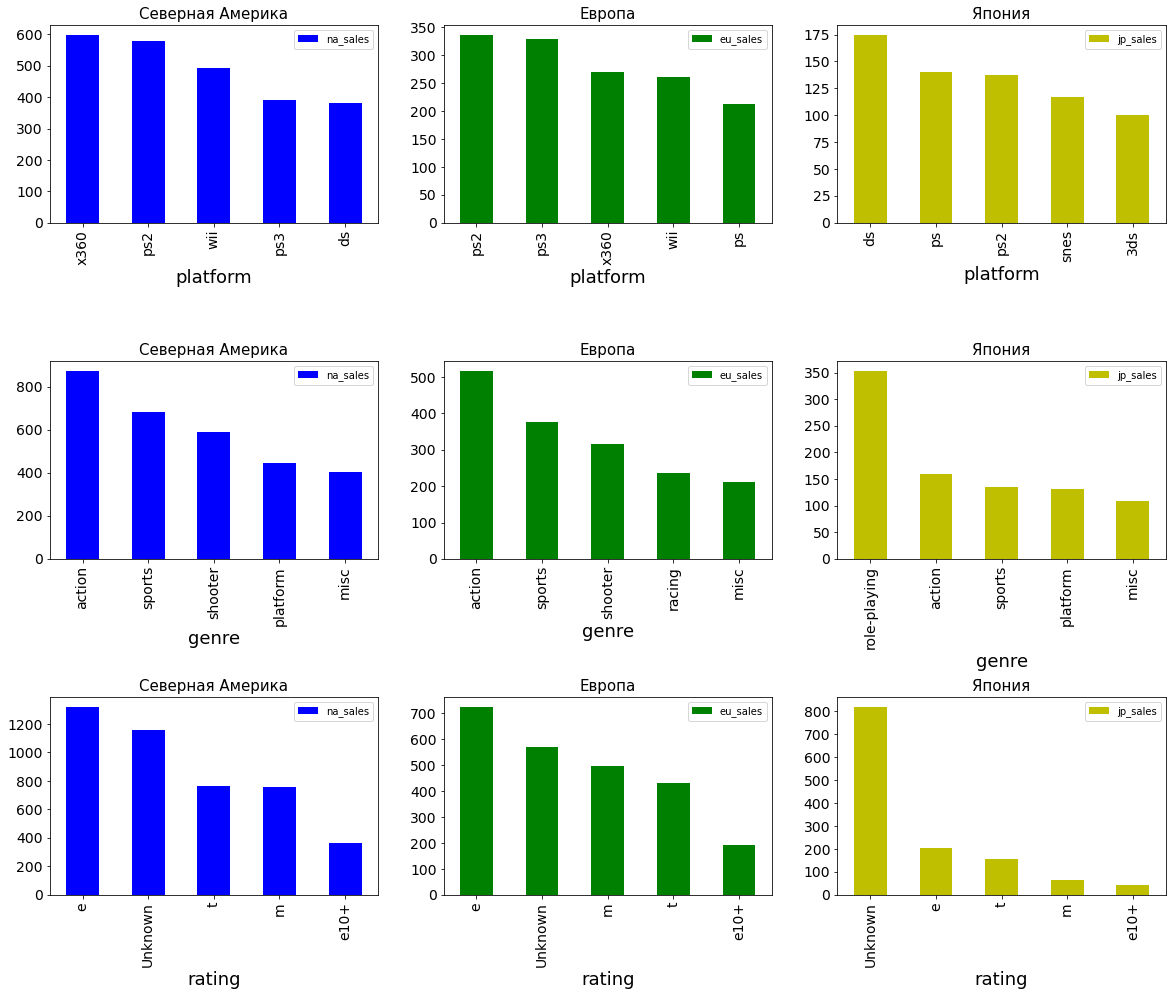

In [72]:
# через цикл отрисуем графики по распределению значений по жанру платформе и рейтингу, за весь период

region = ['na_sales','eu_sales','jp_sales']
title = ['Северная Америка', 'Европа', 'Япония']*3
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.7)

col= ['b', 'g', 'y', 'b', 'g', 'y', 'b', 'g', 'y']
serial_number = 1
x=0
t=0
for p in parametrs:
    for r in region:
        ax = plt.subplot(3,3,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = data.groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        print (user_portrait)
        user_portrait.plot(kind='bar', ax=ax, label = p, fontsize=14, color = col[x])
        plt.title(title[t], size=15)
        serial_number += 1
        x +=1
        t +=1

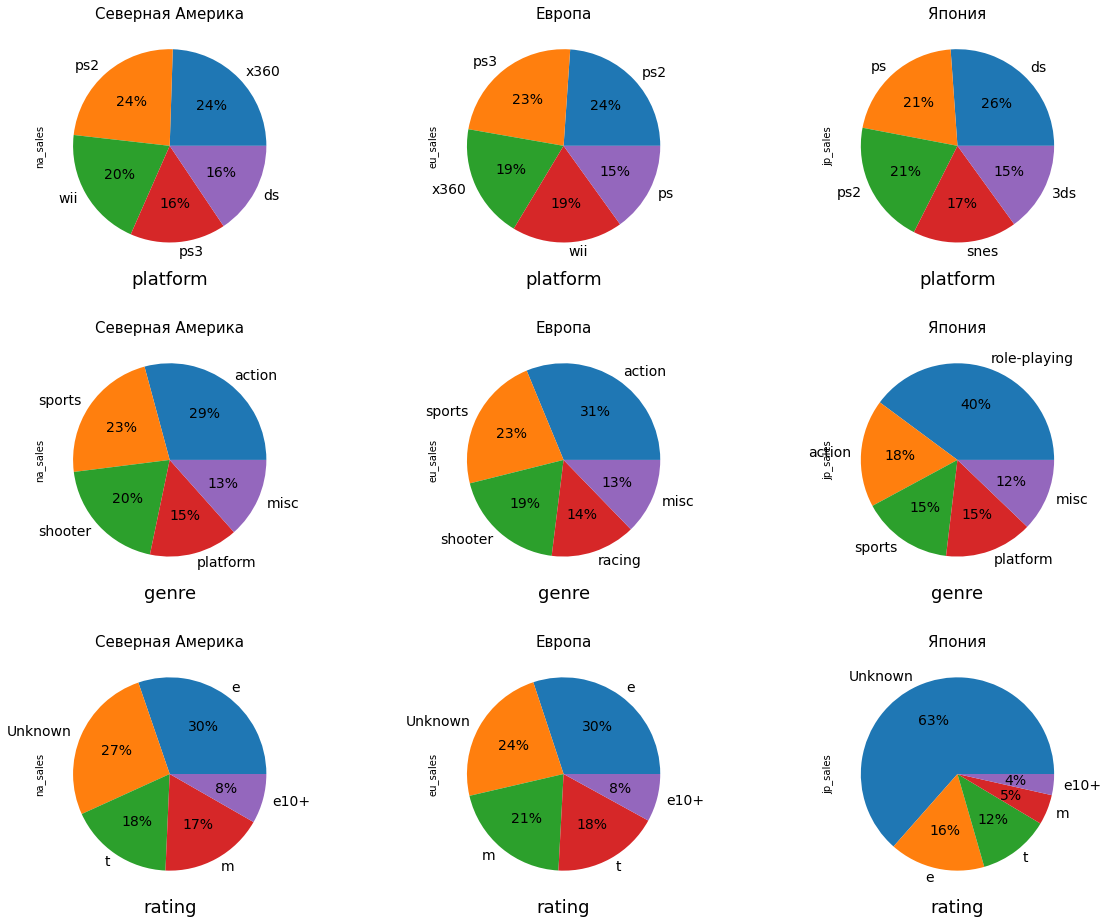

In [73]:
# для наглядности так же построим круговые диаграммы что бы можно было увидеть доли от целого.

region = ['na_sales','eu_sales','jp_sales']
title = ['Северная Америка', 'Европа', 'Япония']*3
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.3)

serial_number = 1
t=0

for p in parametrs:
    for r in region:
        ax = plt.subplot(3,3,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = data.groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        user_portrait.plot(kind='pie', ax=ax, fontsize=14, subplots=True, legend = False, autopct='%1.0f%%')
        plt.title(title[t], size=15)
        serial_number += 1
        x +=1
        t +=1

**Топ 5 платформ, жанров и рейтингов за 2015 и неполный 2016 год, по регионам Северная Америка, Европа, Япония**

          na_sales
platform          
ps4          63.86
xone         50.30
3ds          10.31
wiiu          8.86
x360          8.05
          eu_sales
platform          
ps4          83.54
xone         28.10
pc            9.10
3ds           7.39
ps3           7.30
          jp_sales
platform          
3ds          23.55
ps4          12.05
psv           8.41
ps3           4.97
wiiu          4.12
              na_sales
genre                 
shooter          48.18
action           33.68
sports           26.31
role-playing     19.82
misc              5.58
              eu_sales
genre                 
shooter          40.28
action           34.82
sports           27.82
role-playing     17.21
racing            6.52
              jp_sales
genre                 
action           23.05
role-playing     13.41
shooter           3.79
misc              3.19
adventure         2.22
         na_sales
rating           
m           50.63
Unknown     32.82
e           26.64
t           23.38
e10+      

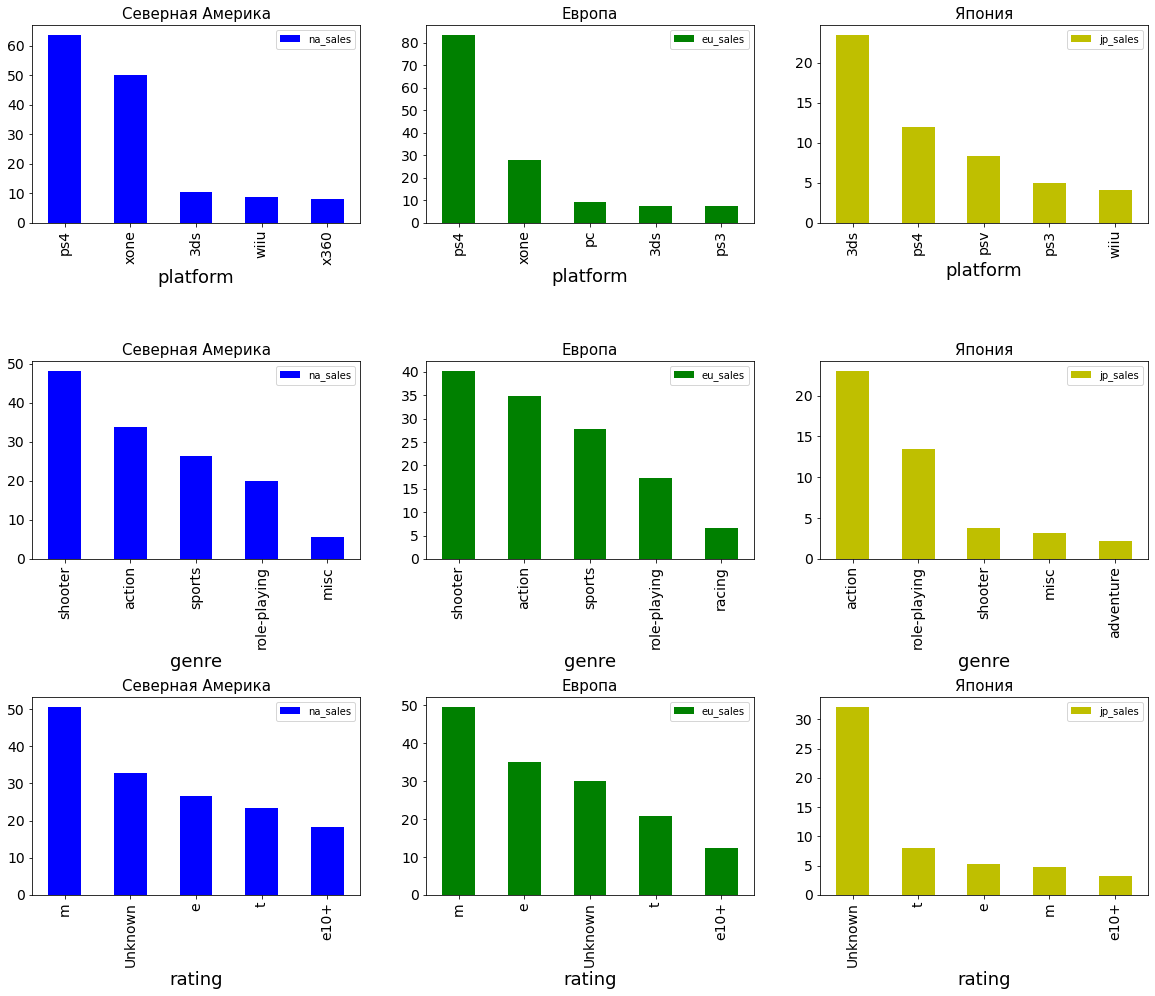

In [74]:
# Взглянем как изменились данные если взять на обзор 1,5 года а не весь изучаемый период

region = ['na_sales','eu_sales','jp_sales']
title = ['Северная Америка', 'Европа', 'Япония']*3
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.7)

col= ['b', 'g', 'y', 'b', 'g', 'y', 'b', 'g', 'y']
serial_number = 1
x=0
t=0

for p in parametrs:
    for r in region:
        ax = plt.subplot(3,3,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = data[data.year_of_release >= 2015]\
                            .groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        print (user_portrait)
        user_portrait.plot(kind='bar', ax=ax, label = p, fontsize=14, color = col[x])
        plt.title(title[t], size=15)
        serial_number += 1
        x +=1
        t +=1

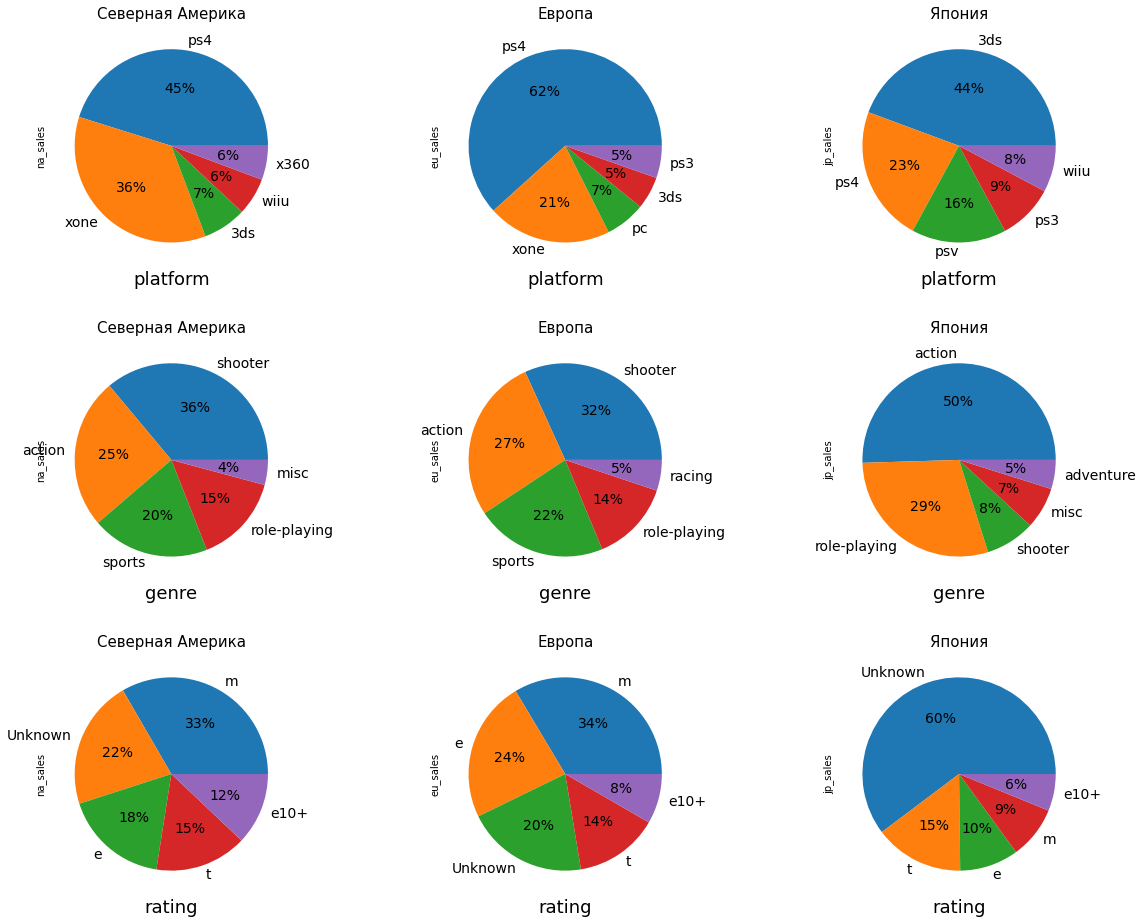

In [75]:
# для наглядности так же построим круговые диаграммы что бы можно было увидеть доли от целого.

region = ['na_sales','eu_sales','jp_sales']
title = ['Северная Америка', 'Европа', 'Япония']*3
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.3)

serial_number = 1
t=0

for p in parametrs:
    for r in region:
        ax = plt.subplot(3,3,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = data[data.year_of_release >= 2015]\
                            .groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        user_portrait.plot(kind='pie', ax=ax, fontsize=14, subplots=True, legend = False, autopct='%1.0f%%')
        plt.title(title[t], size=15)
        serial_number += 1
        x +=1
        t +=1

**Расшифровка обозначения рейтингов**

Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки.


**«EC» («Early childhood») — «Для детей младшего возраста»:** 

**«E» («Everyone») — «Для всех»:** 

**«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»:** 

**«T» («Teen») — «Подросткам»:** Игра подходит для лиц от 13 лет

**«M» («Mature») — «Для взрослых»:** 

**«AO» («Adults Only 18+») — «Только для взрослых»:** 

**«RP» («Rating Pending») — «Рейтинг ожидается»:** 

**«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»:** 


**Выводы:**  
**Портрет пользователя в Северной Америке:**

- Топ 5 платформ в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS
- Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "е - для всех", игр без рейтинга, и на третьем месте игры с рейтингом "т - от 13 и выше"

Если посмотреть на данные с 2015 по 2016 года, то мы видим:
- Топ игровых приставок изменился : PS4, Xone, DS3
- Топ жанров игр: Shooter, Action, Sports
- Топ рейтингов игр : "M — «Для взрослых»" , "без рейтинга" и "е - для всех"
    
**Портрет пользователя в Европе:**

- Топ 5 платформ в Европе, за все время это: PS2, PS3, X360, WII, PS
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "е - для всех", на втором месте игры  без рейтинга, третье -  "M — «Для взрослых»" 

За последний актуальный год интерес у пользователя изменился:
- Топ платформ: PS4, Xone, PC
- Топ жанров стал: shooter, action, sports
- Топ рейтингов: "м - От 17 и выше" , "е - для всех" и  без рейтинга
    
**Портрет пользователя в Японии:**

- Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
- Топ по рейтингу:  без рейтинга, "е - для всех", и на третьем месте игры с рейтингом "т - от 13 и выше"

За последний год интерес у пользователя изменился:
- Топ платформ: 3ds, ps4, psv
- Топ Жанров: action, role-playing, shooter
- топ рейтингов: без рейтинга, "т - от 13 и выше" и "е - для всех"

Стоит отдельно обратить внимание на категорию рейтинга - "Unknown" т.е "без рейтинга". В рейтинге региона Японии такие игры составляют целых 60%. Т.е Авторы игр для выхода на локальный рынок другого региона не будут заинтересованы в получении рейтинга по американским стандартам. Т.е данный рейтинг является как бы показатель доли игр пришедший в данный регион "из-вне". В регионе Японии эта доля намного больше остальных регионов. 60% против 20% в других рассматриваемых регионах.


**Прогноз**

Для прогноза будущих продаж лучше брать данные за последний год-два, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут быть изменчивы. Соответственно, для построения прогноза на 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом «M» («Mature») — «Для взрослых». 

Серия таких игр как Call of Duty и Battlefield хорошо усвоили данные выводы.

## Гипотезы


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Пороговое значение alpha зададим самостоятельно.
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

Для проверки гипотез будем использовать метод **scipy.stats.ttest_ind()**  
Т.к у нас есть 2 совокупности, и нам нужно сопоставить их среднее. Проверка гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, как раз выполняется с помощью вышеупомянутого теста.  

А так же у нас есть сомнения, что дисперсии у совокупностей одинаковые, поэтому мы так же будем использовать парамер equal_var=False, и тест посчитает дисперсии выборок по отдельности.

**Нулевая гипотеза (𝐻0)** – утверждение о параметре генеральной совокупности (параметрах генеральных совокупностей) или распределении, которое необходимо проверить.

**Альтернативная гипотеза (𝐻1)** – утверждение, противоположное нулевой гипотезе. Выдвигается, но не проверяется. На него мы «соглашаемся» в случае, если нулевую гипотезу на основе имеющихся данных необходимо отвернуть.

**Уровень значимости (𝛼)** – вероятность отвергнуть верную нулевую гипотезу.
Нулевая гипотеза всегда проверяется на определённом уровне значимости. Например, если мы проверяем нулевую гипотезу на уровне значимости 5%, это означает, что если мы будем проводить аналогичные исследования 100 раз и проверять на основе имеющихся данных интересующую нас нулевую гипотезу, в 5 случаях из 100 мы отвергнем нулевую гипотезу, хотя она будет верной.

Уровень доверия 99 % чрезмерно велик в нашем случае. Такой уровень используется только в таких науках, где ошибка очень дорого стоит: медицина, химия и т.д., где мы не можем рисковать вообще, мы должны сотни раз перепроверить, что мы можем отказаться от нулевой гипотезы. В общественных науках (в т.ч. и в экономике), в бизнесе мы можем рисковать. Поэтому классический уровень доверия тут определим в 95 %. 

Следовательно определим уровень значимости (alpha) в 5%

**P-value** – это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. Более неформально, p-value – это «жизнеспособность» нулевой гипотезы, которую мы оцениваем по имеющимся данным.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [79]:
#Создадим переменные которые будут хранить данные по оценкам пользователей за последние полные 10 лет, по каждой платформе

x_one = data.query('platform == "xone" and user_score >= 0 and year_of_release >= 2005')['user_score']
pc = data.query('platform == "pc" and user_score >= 0 and year_of_release >= 2005')['user_score']

# расчитаем среднюю оценку для каждой платформы

print('Средний пользовательский рейтинг платформы Xbox One', format(x_one.mean(), '.2f'))
print('Средний пользовательский рейтинг платформы PC', format(pc.mean(), '.2f'))

# Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(x_one, pc, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One 6.52
Средний пользовательский рейтинг платформы PC 6.89
p-значение: 0.002004560075355935
Отвергаем нулевую гипотезу


In [80]:
# проверим 1ую гипотезу с более актуальным периодом за один полный год и часть 2016

x_one = data.query('platform == "xone" and user_score >= 0 and year_of_release >= 2015')['user_score']
pc = data.query('platform == "pc" and user_score >= 0 and year_of_release >= 2015')['user_score']

print('Средний пользовательский рейтинг платформы Xbox One', format(x_one.mean(), '.2f'))
print('Средний пользовательский рейтинг платформы PC', format(pc.mean(), '.2f'))

alpha = .05

results = st.ttest_ind(x_one, pc, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One 6.54
Средний пользовательский рейтинг платформы PC 6.30
p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- Если проанализировать данные за 10 полных лет. Мы получили значение p-value равное менее 1% -0.002%, при уровне значимости в 1%. По имеющимся данным, есть основания отвергнуть Нулевую гипотезу в пользу альтернативной. Иначе говоря, у нас практически нет вероятности получить одинаковые средние пользовательские рейнтинги по двум платформам.
- Если проанализировать данные за последний полный год и часть 2016. Ситуация меняется. Значение p-value в данном случае равно почти 30% (0.29%), при уровне значимости в 1%. По имеющимся данным, нет оснований отвергнуть Нулевую гипотезу в пользу альтернативной. Средние пользовательские рейтинги по двум платформам могут быть одинаковыми.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [81]:
# проверка 2-ой гипотезы с диапазоном в 10 полных лет

genre_action = data.query('genre == "action" and user_score >= 0 and year_of_release >= 2005')['user_score']
genre_sports = data.query('genre == "sports" and user_score >= 0 and year_of_release >= 2005')['user_score']

print('Средний пользовательский рейтинг жанра Action', format(genre_action.mean(), '.2f'))
print('Средний пользовательский рейтинг жанра Spotrs', format(genre_sports.mean(), '.2f'))

alpha = .05

results = st.ttest_ind(genre_action, genre_sports, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action 6.95
Средний пользовательский рейтинг жанра Spotrs 6.54
p-значение: 3.5057406183828224e-09
Отвергаем нулевую гипотезу


In [82]:
# проверка 2-ой гипотезы с диапазоном за один полный год + неполный 2016г

genre_action = data.query('genre == "action" and user_score >= 0 and year_of_release >= 2015')['user_score']
genre_sports = data.query('genre == "sports" and user_score >= 0 and year_of_release >= 2015')['user_score']

print('Средний пользовательский рейтинг жанра Action', format(genre_action.mean(), '.2f'))
print('Средний пользовательский рейтинг жанра Spotrs', format(genre_sports.mean(), '.2f'))

alpha = .05

results = st.ttest_ind(genre_action, genre_sports, equal_var=False)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action 6.81
Средний пользовательский рейтинг жанра Spotrs 5.20
p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


**Вывод:** Получив значение p-value, мы отвергли Нулевую гипотезу. исходя из этого, у нас почти нет вероятности получить одинаковые средние пользовательские рейнтинги по двум жанрам. Результат с актуальным периодом оказался схожим.

**Итого по проверке гипотез:**

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Отвергаем нулевую гипотезу (с более актуальным периодом исследования - Не получилось отвергнуть нулевую гипотезу)
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

## Общий вывод

- Непосредственно перед анализом данных, мы провели предобработку наших данных: привели к правильным данным столбцы, привели к нижнему регистру значения таблицы и сами названия колонок и привели к правильным типам данных необходимые столбцы. 
- После определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.
- Пустые значения по оценкам и рейтингу заменили на значения-маркеры.


**Выводы по исследовательскому анализу данных:**
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью начиная с 90х годов до 2008 года. С 2008 года, предположительно после того как массово начали создавать мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Средний жизненый цикл игровой платформы составляет около 10-ти лет. Пик продаж наступает примерно на середине жизненого цикла приставки.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- За актуальный период рост продаж показали только 2 платформы ps4 и Xone.
- Остальные платформы ps3 3ds и x360 показали спад.
- Спад ps3 b x360 можно обьяснить выходом приставок следующих поколений которые из заместили.
- Спад 3ds равномерный и не такой сильный - его можно обьяснить естественным снижением интереса потребителей к данной приставки по истечению времени. Всетаки 3ds занимает немного другое, "свое" место на данном рынке, потому что является портативной игровой консолью. И на его место в будущем придет Nintendo Switch в 2017 году, уже за рамками исследуемого нами здесь периода.
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Значительнее корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей.
- Стоит отметить что тройка лидеров вне зависимости от исследуемого периода не меняется. Это Action, Sport, and Shooter.
- Лидирующим жанром по доходности оказался Shooter, sports и platform на втором и третьем месте соответственно. Данные платформы лидируют как по средним значениям так и по Медианным. 
- Самыми менее доходными оказались жанры strategy puzzle and adventure.

**После мы составили портреты пользователей каждого региона:**

Портрет пользователя в Северной Америке:
- Топ 5 платформ в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS
- Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "е - для всех", игр без рейтинга, и на третьем месте игры с рейтингом "т - от 13 и выше"

Если посмотреть на данные с 2015 по 2016 года, то мы видим:
- Топ игровых приставок изменился : PS4, Xone, DS3
- Топ жанров игр: Shooter, Action, Sports
- Топ рейтингов игр : "M — «Для взрослых»" , "без рейтинга" и "е - для всех"
    
Портрет пользователя в Европе:
- Топ 5 платформ в Европе, за все время это: PS2, PS3, X360, WII, PS
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом "е - для всех", на втором месте игры  без рейтинга, третье -  "M — «Для взрослых»"

За последний актуальный год интерес у пользователя изменился:
- Топ платформ: PS4, Xone, PC
- Топ жанров стал: shooter, action, sports
- Топ рейтингов: "м - От 17 и выше" , "е - для всех" и  без рейтинга
    
Портрет пользователя в Японии:

- Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
- Топ по рейтингу:  без рейтинга, "е - для всех", и на третьем месте игры с рейтингом "т - от 13 и выше"  

За последний год интерес у пользователя изменился:
- Топ платформ: 3ds, ps4, psv
- Топ Жанров: action, role-playing, shooter
- топ рейтингов: без рейтинга, "т - от 13 и выше" и "е - для всех"

Стоит отдельно обратить внимание на категорию рейтинга - "Unknown" т.е "без рейтинга". В рейтинге региона Японии такие игры составляют целых 60%. Т.е Авторы игр для выхода на локальный рынок другого региона не будут заинтересованы в получении рейтинга по американским стандартам. Т.е данный рейтинг является как бы показатель доли игр пришедший в данный регион "из-вне". В регионе Японии эта доля намного больше остальных регионов. 60% против 20% в других рассматриваемых регионах.

**Прогноз**

Для прогноза будущих продаж лучше брать данные за последний год-два, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут быть изменчивы. Соответственно, для построения прогноза на 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом «M» («Mature») — «Для взрослых». 

Исходя из всех данных мне кажется, что лучше всего продавать игры для таких приставок как Sony Playstation 4
Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.